# Plots for report

This notebook tries to find if there are similarities in shopper behaviour using network analysis.

## Load dependencies

In [ ]:
!pip install -e .

In [ ]:
!pip install tqdm
!pip install imageio

In [3]:
import pandas as pd
import numpy as np
import copy

from scipy import stats

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
matplotlib.style.use('ggplot')

import seaborn as sns
from tqdm import tqdm_notebook as tqdm

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from msci.utils import utils
from msci.utils.utils import data_path
from msci.analysis.networks import *
from msci.utils.plot import create_count_of_shoppers_gif, create_count_of_shoppers_image
from msci.utils.plot import plot_path_jn, plot_histogram_jn, plot_points_on_map_jn
from msci.analysis.markov_chain import *

In [6]:
from sklearn import preprocessing
from scipy.stats import linregress

## Plots needed

Data preparation
 - mall of mauritius (✔️)
 - triangulation (✔️)
 - dataset example
 - speed of the devices (✔️)
 - dbscan: diagram (✔️)
 - dbscan: radius of gyration against length of stay (✔️)
 - bayesian: sequential 
 - bayesian: radius of gyration against length of stay (✔️)
 - number of devices in the mall against time (✔️)
 
Complexity Analysis
 - Levy walk example
 - path length distribution - one mall (✔️)
 - (path length distribution - all mall)
 - (satter plot of the mall)
 - nmber of people in a shop against area (✔️)

Agent-based model
 - number of shoppers entering over the day (✔️)
 - number of shoppers against the length of stay (✔️)
 - number of people in a shop against area (base case) (✔️)
 - number of people in a shop against area (steady-state case) (✔️)
 - number of people in a shop against area (markov chain) (✔️)
 
Community detection
 - modularity network (✔️)
 - hausdorff distance example
 - hausdorff distance shoppers on map (✔️)
 - keywords tripartite network
 - keywords probabiliy against degree

In [7]:
intro_path = r"C:\Users\tvb\OneDrive\Documents\Imperial\Year 4\Project\Report\Chapter1\Figs/"
preparation_path = r"C:\Users\tvb\OneDrive\Documents\Imperial\Year 4\Project\Report\Chapter2\Figs/"
complexity_path = r"C:\Users\tvb\OneDrive\Documents\Imperial\Year 4\Project\Report\Chapter3\Figs/"
model_path = r"C:\Users\tvb\OneDrive\Documents\Imperial\Year 4\Project\Report\Chapter4\Figs/"
community_path = r"C:\Users\tvb\OneDrive\Documents\Imperial\Year 4\Project\Report\Chapter5\Figs/"

## Get data

In [8]:
mac_address_df = utils.import_mac_addresses(version=4)
signal_df = utils.import_signals(version=4)

c:\users\tvb\envs\venv-msci\lib\site-packages\IPython\core\interactiveshell.py:2850: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [9]:
shopper_df = mac_address_df[
    (mac_address_df.dbscan_label == 'Shopper') &
    (mac_address_df.wifi_type != 'lawifiuser')
]

In [10]:
mac_address_df.dbscan_label.value_counts()

Not Classified    144626
Shopper             8928
Mall Worker          156
Stationary           143
Name: dbscan_label, dtype: int64

In [11]:
mac_address_df.bayesian_label.value_counts()

Not Classified    132173
Shopper            19794
Mall Worker         1172
Stationary           714
Name: bayesian_label, dtype: int64

## Plots

### Introduction

### Data Preparation

In [12]:
csfont = {'fontname':'Times New Roman'}
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Times New Roman',style='normal', size=30)

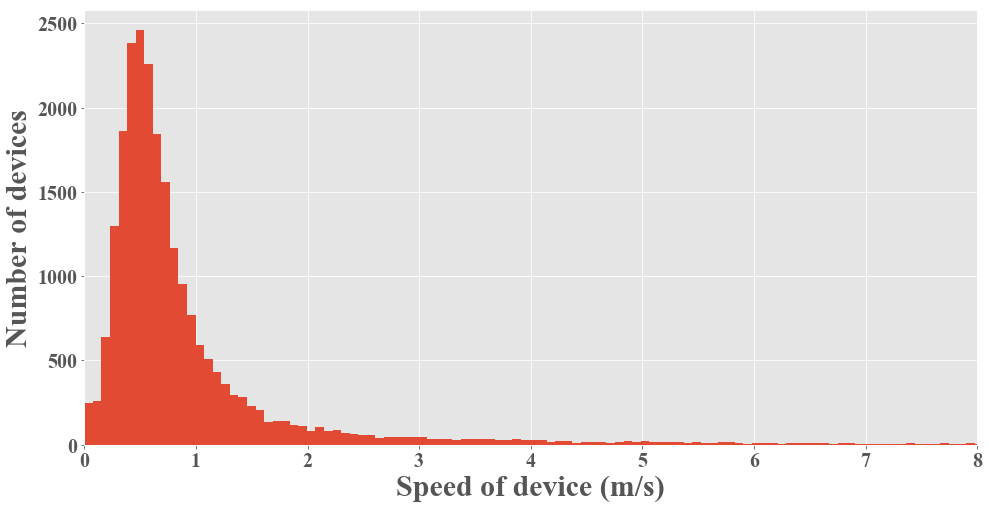

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

devices_df = mac_address_df[
    (mac_address_df.frequency > 10)
]

devices_df.av_speed.hist(bins=300, ax=ax)
ax.set_ylabel('Number of devices', fontsize=30, **csfont)
ax.set_xlabel('Speed of device (m/s)', fontsize=30, **csfont)
ax.set_xlim(left=0, right=8)
ax.tick_params(labelsize=20)

ax.set_xticklabels(ax.get_xticks().astype(int), csfont)
ax.set_yticklabels(ax.get_yticks().astype(int), csfont);

fig.savefig(preparation_path+'speed_histogram.eps', transparent=True)

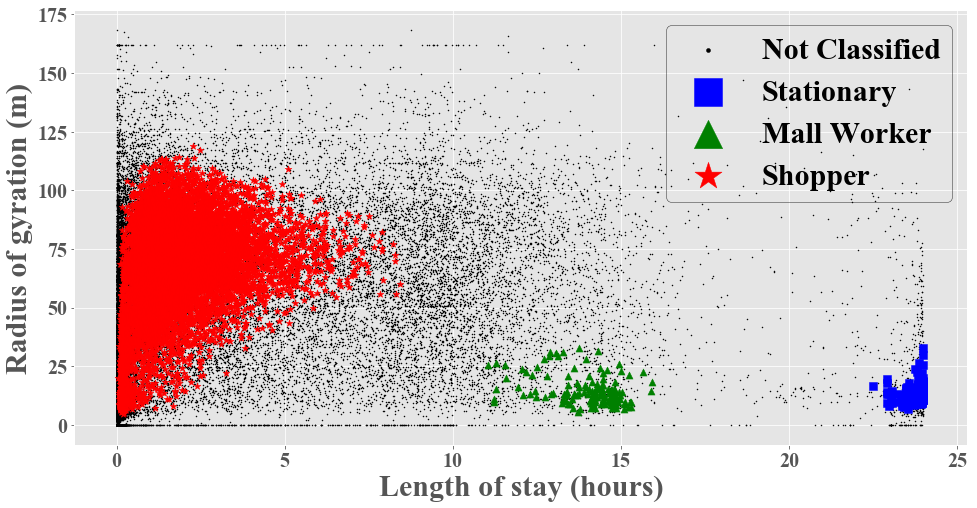

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

labels = mac_address_df.dbscan_label.unique()
output_label_group = mac_address_df.groupby('dbscan_label')

colours = ['k', 'b', 'g', 'r']
markers = [',', 's', '^', '*']

i = 0
for label in labels:
    label_group = output_label_group.get_group(label)
    x = label_group.length_of_stay.as_matrix()
    y = label_group.radius_of_gyration.as_matrix()
    if label == 'Not Classified':
        ax.scatter(x/60/60, y, c=colours[i], label=label, s=1)
    else:
        ax.scatter(x/60/60, y, c=colours[i], label=label, s=50, marker=markers[i])
    i += 1
    
ax.set_xlabel('Length of stay (hours)', fontsize=30, **csfont)
ax.set_ylabel('Radius of gyration (m)', fontsize=30, **csfont)
ax.legend(markerscale=4., prop=font, frameon=True, edgecolor='k', facecolor='none')
ax.tick_params(labelsize=20)

ax.set_xticklabels(ax.get_xticks().astype(int), csfont)
ax.set_yticklabels(ax.get_yticks().astype(int), csfont);

fig.savefig(preparation_path+'dbscan_clustering_example.png', dpi=400, transparent=True)

In [15]:
import msci.cleaning.bayesian_inference as bay

In [104]:
feature_list = bay.FEATURE_LIST[1:]
prior_list = [0.2, 0.7, 0.1]

prob_estimates, unclassified_macs, unclassified_df = bay.sequential(prior_list, mac_address_df, feature_list, three_devices=True)
#bay.plot_probability_trace(prob_estimates, feature_list)

radius_of_gyration
count_density_variance
av_speed


c:\users\tvb\documents\repos\msci-complexity-project\msci\cleaning\bayesian_inference.py:45: RuntimeWarning: invalid value encountered in true_divide
  normal_stationary_posterior = posterior_stationary / sums
c:\users\tvb\documents\repos\msci-complexity-project\msci\cleaning\bayesian_inference.py:46: RuntimeWarning: invalid value encountered in true_divide
  normal_shopper_posterior = posterior_shopper / sums
c:\users\tvb\documents\repos\msci-complexity-project\msci\cleaning\bayesian_inference.py:47: RuntimeWarning: invalid value encountered in true_divide
  normal_worker_posterior = posterior_worker / sums


av_turning_angle
av_path_length
av_straightness
turning_angle_density


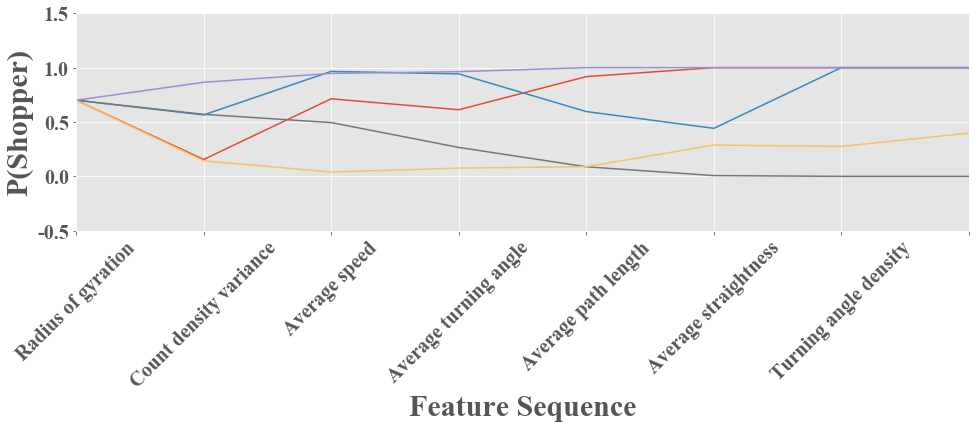

In [128]:
feature_names = [
    'Radius of gyration',
    'Count density variance',
    'Average speed',
    'Average turning angle',
    'Average path length',
    'Average straightness',
    'Turning angle density'
]

stationary = [i[0] for i in prob_estimates]
shopper = [i[1] for i in prob_estimates]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 4))
for mac in [751, 10001, 10012, 1057, 109]:
    y = [i[mac] for i in shopper]
    ax.plot(range(len(feature_list)+1), y)
ax.set_ylim((-0.5, 1.5))
ax.set_xlim((0, len(feature_list)))


ax.set_xlabel('Feature Sequence', fontsize=30, **csfont)
ax.set_ylabel('P(Shopper)', fontsize=30, **csfont)
ax.legend(markerscale=4., prop=font, frameon=True, edgecolor='k', facecolor='none')
ax.tick_params(labelsize=20)

# plt.xticks(range(len(feature_list)), feature_list, rotation='vertical')

ax.set_xticklabels(feature_names, csfont, rotation=45)
ax.set_yticklabels(ax.get_yticks(), csfont);

fig.savefig(preparation_path+'sequential_bayes.eps', transparent=True, bbox_inches="tight")

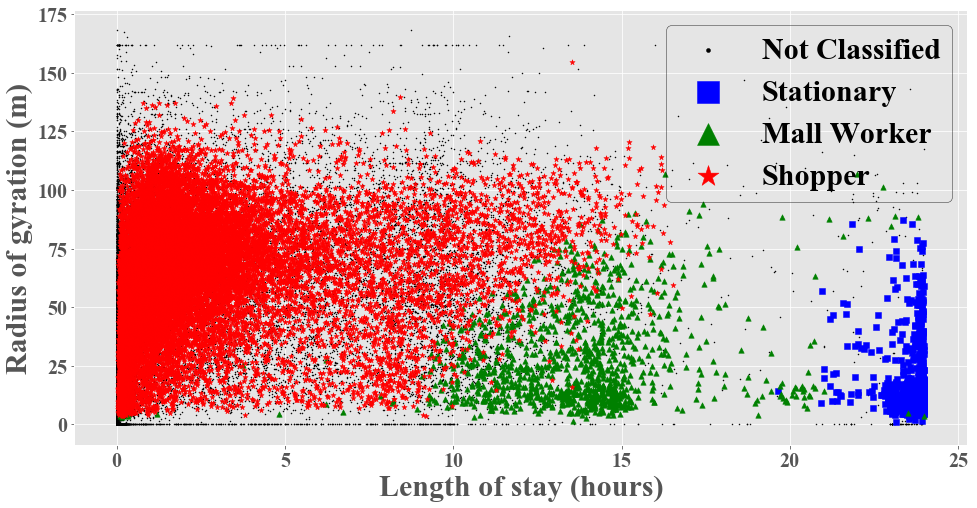

In [236]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

labels = mac_address_df.dbscan_label.unique()
output_label_group = mac_address_df.groupby('bayesian_label')

colours = ['k', 'b', 'g', 'r']
markers = [',', 's', '^', '*']

i = 0
for label in labels:
    label_group = output_label_group.get_group(label)
    x = label_group.length_of_stay.as_matrix()
    y = label_group.radius_of_gyration.as_matrix()
    if label == 'Not Classified':
        ax.scatter(x/60/60, y, c=colours[i], label=label, s=1)
    else:
        ax.scatter(x/60/60, y, c=colours[i], label=label, s=30, marker=markers[i])
    i += 1
    
ax.set_xlabel('Length of stay (hours)', fontsize=30, **csfont)
ax.set_ylabel('Radius of gyration (m)', fontsize=30, **csfont)
ax.legend(markerscale=4., prop=font, frameon=True, edgecolor='k', facecolor='none')
ax.tick_params(labelsize=20)

ax.set_xticklabels(ax.get_xticks().astype(int), csfont)
ax.set_yticklabels(ax.get_yticks().astype(int), csfont);

fig.savefig(preparation_path+'bayesian_clustering_example.png', dpi=400, transparent=True)

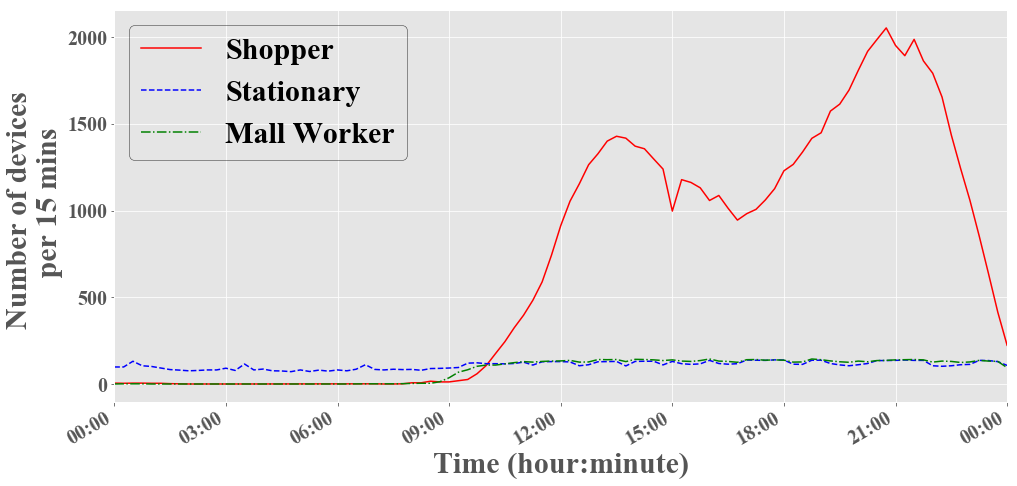

In [237]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

macs = mac_address_df[mac_address_df.dbscan_label == 'Shopper'].mac_address.tolist()

plot_histogram_jn(
    signal_df[signal_df.mac_address.isin(macs)], 
    axes=ax,
    label='Shopper',
    style='r-'
);

macs = mac_address_df[mac_address_df.dbscan_label == 'Stationary'].mac_address.tolist()

plot_histogram_jn(
    signal_df[signal_df.mac_address.isin(macs)], 
    axes=ax,
    label='Stationary',
    style='b--'
);

macs = mac_address_df[mac_address_df.dbscan_label == 'Mall Worker'].mac_address.tolist()

plot_histogram_jn(
    signal_df[signal_df.mac_address.isin(macs)], 
    axes=ax,
    label='Mall Worker',
    style='g-.'
);


import matplotlib.dates as dates
# ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))

ax.legend(prop=font, frameon=True, edgecolor='k', facecolor='none')
ax.set_ylabel('Number of devices \n per 15 mins', fontsize=30, **csfont)
ax.set_xlabel('Time (hour:minute)', fontsize=30, **csfont)
ax.tick_params(labelsize=20)

ax.set_xticklabels(ax.get_xticks(), csfont)
ax.set_yticklabels(ax.get_yticks().astype(int), csfont);
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'));

fig.savefig(preparation_path+'devices_vs_time.eps', transparent=True)

### Complexity Analysis

In [127]:
import msci.analysis.complexity as comp

In [213]:
path_lengths = comp.path_length(signal_df[signal_df.mac_address.isin(shopper_df.mac_address)])

HBox(children=(IntProgress(value=0, max=8090), HTML(value='')))

c:\users\tvb\envs\venv-msci\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


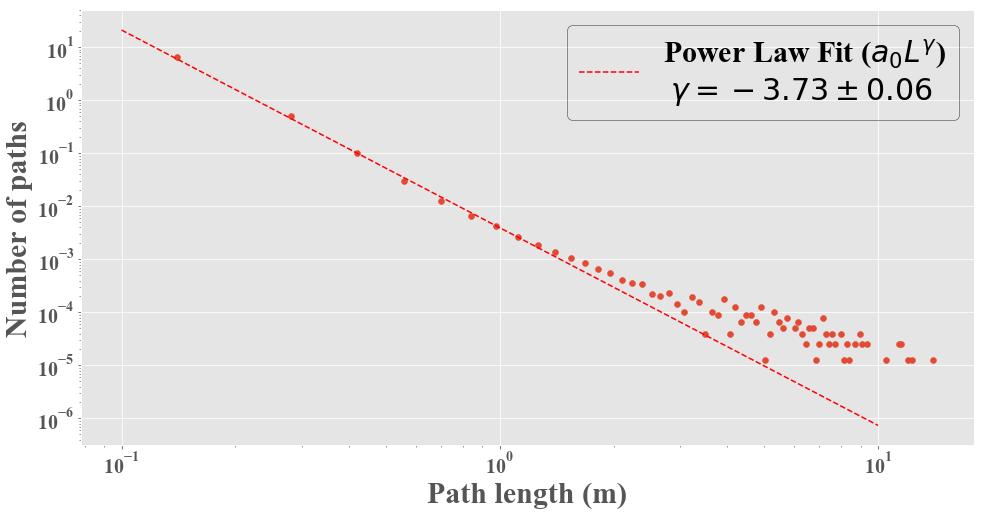

In [297]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

y, x = np.histogram(np.array(path_lengths)/10, bins=100, normed=True)
mask = np.isinf(np.log10(y))
x = x[1:][~mask]
y = y[~mask]

ax.scatter(x, y)

slope, intercept, x_value, p_value, std_err = linregress(np.log10(x[:10]), np.log10(y[:10]))
x_fit = np.linspace(10**(-1), 10**(1), 10)
y_fit = [10**intercept*x**slope for x in x_fit]
ax.plot(
    x_fit, y_fit, 
    'r--', 
    label='Power Law Fit ($a_0L^{\gamma}$) \n $\gamma=%.2f \pm %.2f$' % (slope, std_err)
)

# x, y = comp.log_bin.log_bin(path_lengths, bin_start=0, first_bin_width=1.1, a=1.3, drop_zeros=True)
# ax.plot(np.array(x), np.array(y), c='b')


ax.set_ylabel('Number of paths', fontsize=30, **csfont)
ax.set_xlabel('Path length (m)', fontsize=30, **csfont)
ax.legend(markerscale=4., prop=font, frameon=True, edgecolor='k', facecolor='none')
ax.tick_params(labelsize=20)
ax.set_xticklabels(ax.get_xticks(), csfont)
ax.set_yticklabels(ax.get_yticks(), csfont)
ax.set_xscale('log')
ax.set_yscale('log')

In [339]:
x = np.cumsum(np.random.choice(path_lengths, size=100) * np.random.choice([-1, 1], size=100))
y = np.cumsum(np.random.choice(path_lengths, size=100) * np.random.choice([-1, 1], size=100))

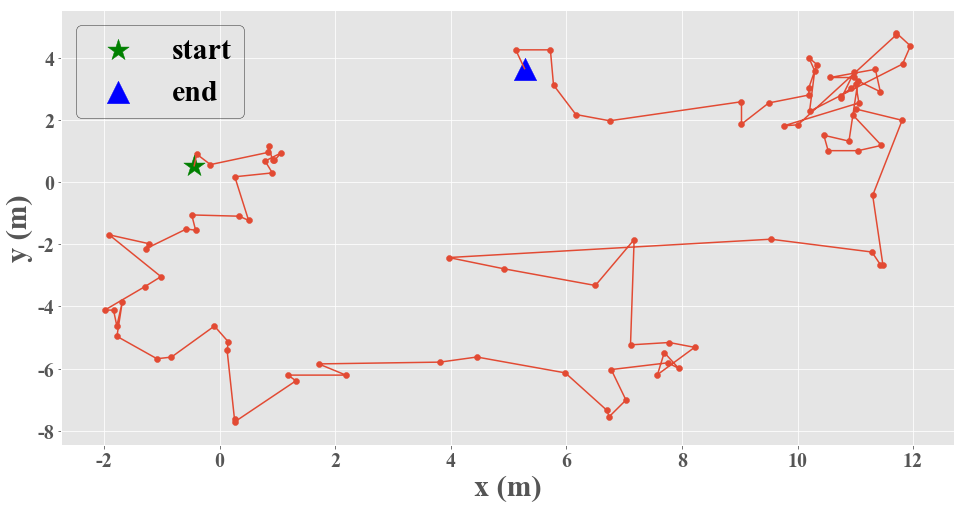

In [353]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(x, y)
ax.scatter(x[1:-1], y[1:-1])
ax.scatter(x[0], y[0], label='start', c='g', marker='*', s=500)
ax.scatter(x[-1], y[-1], label='end', c='b', marker='^', s=500)

ax.set_ylabel('y (m)', fontsize=30, **csfont)
ax.set_xlabel('x (m)', fontsize=30, **csfont)
ax.tick_params(labelsize=20)
ax.legend(markerscale=1., prop=font, frameon=True, edgecolor='k', facecolor='none')
ax.set_xticklabels(ax.get_xticks().astype(int), csfont)
ax.set_yticklabels(ax.get_yticks().astype(int), csfont);

fig.savefig(intro_path+'levy_walk.eps', transparent=True)

In [110]:
shop_df_old = utils.import_shop_directory(mall='Mall of Mauritius', version=2)
shop_df1 = utils.import_shop_directory(mall='Mall of Mauritius', version=1)

shop_df = pd.merge(
    shop_df_old, 
    shop_df1[['store_id', 'store_name', 'store_category']], 
    how='left',
    on='store_id'
)

In [115]:
def add_count_of_shoppers(signal_df, shop_df):
    count_of_shoppers = []
    signal_group = signal_df.groupby('store_id')
    for shop in tqdm(shop_df.store_id.tolist(), desc='Count of shoppers'):
        try:
            group = signal_group.get_group(shop)
            count_of_shoppers.append(len(group.mac_address.unique()))
        except:
            count_of_shoppers.append(np.nan)
    return count_of_shoppers

In [116]:
shop_df['act_count'] = add_count_of_shoppers(signal_df, shop_df)

HBox(children=(IntProgress(value=0, description='Count of shoppers', max=126), HTML(value='')))

In [118]:
area_shop_df = shop_df[(shop_df.area > 5) & (shop_df.act_count > 400)]

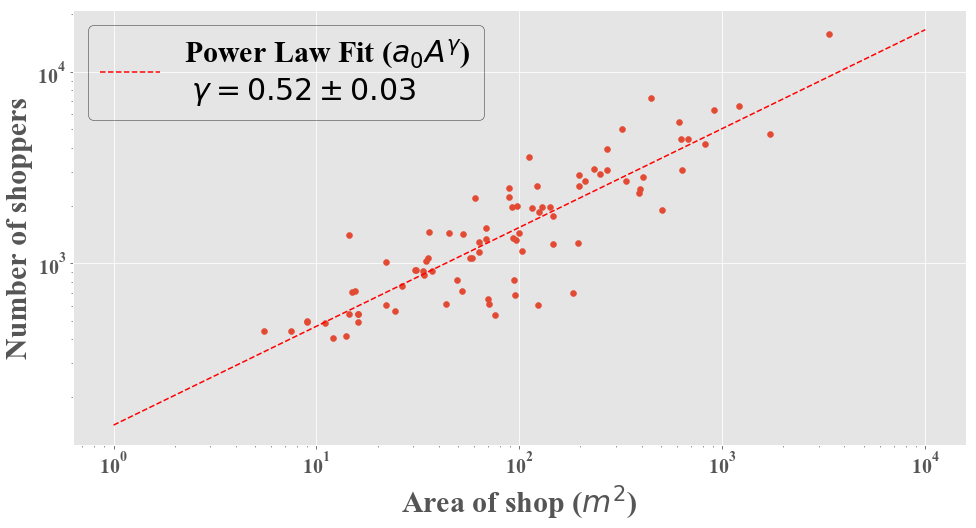

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

x = area_shop_df.area.tolist()
y = area_shop_df.act_count # / sum(area_shop_df.count_of_shoppers)).tolist()

ax.scatter(x, y, label=None)

slope, intercept, x_value, p_value, std_err = linregress(np.log10(x), np.log10(y))
x_fit = np.linspace(10**(0), 10**(4), 10)
y_fit = [10**intercept*x**slope for x in x_fit]
ax.plot(
    x_fit, y_fit, 
    'r--', 
    label='Power Law Fit ($a_0A^{\gamma}$) \n $\gamma=%.2f \pm %.2f$' % (slope, std_err)
)

ax.set_xlabel('Area of shop ($m^2$)', fontsize=30, **csfont)
ax.set_ylabel('Number of shoppers', fontsize=30, **csfont)
ax.legend(markerscale=4., prop=font, frameon=True, edgecolor='k', facecolor='none')
ax.tick_params(labelsize=20)
ax.set_xticklabels(ax.get_xticks(), csfont)
ax.set_yticklabels(ax.get_yticks(), csfont)
ax.set_xscale('log')
ax.set_yscale('log')

# fig.savefig('mac_addresses_15_mins.png', dpi=400, transparent=True)

### Agent-based model

In [106]:
start_date_time = datetime.datetime(year=2016, month=12, day=22, hour=8, minute=30)
end_date_time = datetime.datetime(year=2016, month=12, day=23, hour=0)

arrival_distribution = gaussian_kde(
    (pd.to_datetime(shopper_df.start_time) - start_date_time).dt.round('15min').dt.total_seconds().as_matrix()
)

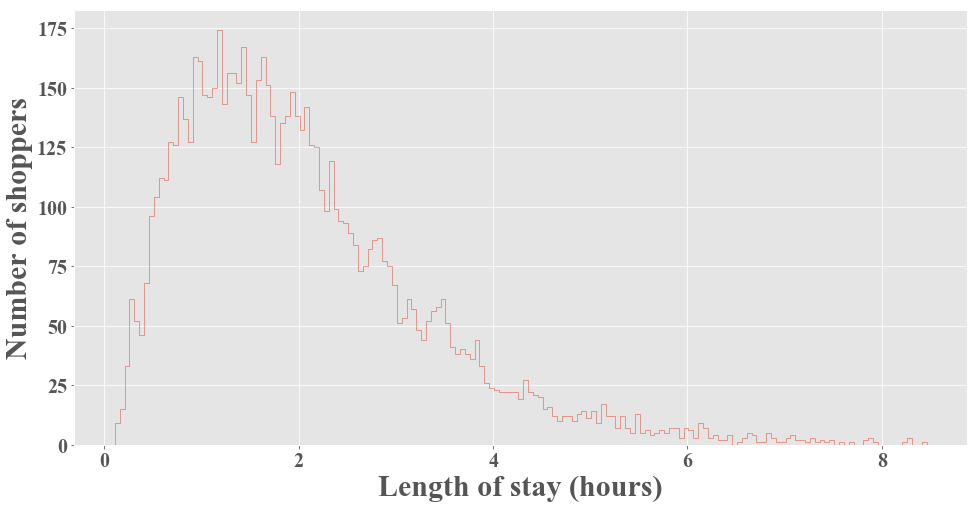

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

binwidth = 0.05

data = (shopper_df.length_of_stay / 60 / 60).as_matrix()
ax.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth), histtype='step');

ax.set_ylabel('Number of shoppers', fontsize=30, **csfont)
ax.set_xlabel('Length of stay (hours)', fontsize=30, **csfont);
ax.set_xticklabels(ax.get_xticks().astype(int), csfont)
ax.set_yticklabels(ax.get_yticks().astype(int), csfont)
ax.tick_params(labelsize=20)

# fig.savefig('length_of_stay_distribution.png', dpi=400, transparent=True)

c:\users\tvb\envs\venv-msci\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
c:\users\tvb\envs\venv-msci\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


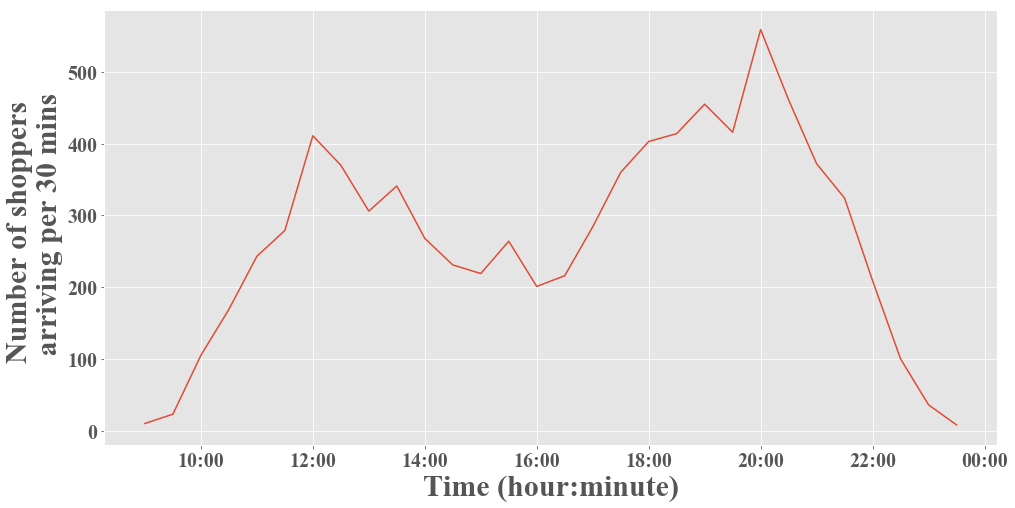

In [114]:
minute_resolution = 30

shopper_df.start_time = pd.to_datetime(shopper_df.start_time)
shopper_df['start_time_round'] = shopper_df.start_time.dt.round(str(minute_resolution) + 'min')
shopper_time_df = shopper_df[
    shopper_df.start_time_round > datetime.datetime(year=2016, month=12, day=22, hour=8, minute=30)
].groupby('start_time_round').mac_address.nunique().to_frame()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 8))

ax.plot(shopper_time_df.index, shopper_time_df.as_matrix())
ax.set_xlabel('Time (hour:minute)', fontsize=30, **csfont)
ax.set_ylabel('Number of shoppers \n arriving per {} mins'.format(minute_resolution), fontsize=30, **csfont)
ax.tick_params(labelsize=20)
ax.set_yticklabels(ax.get_yticks().astype(int), csfont);

plt.xticks(fontname = "Times New Roman")

ax.set_xticklabels(ax.get_xticks(), csfont)
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'));

# fig.savefig('start_time_distribution.png', dpi=400, transparent=True)

Link to [Steady-state](markov_chain_analysis.ipynb)

Link to [Simulation](../../modelling/network/animate_simulation.ipynb)

### Community detection

Link to [Hausdorff distance](hausdorff_analysis.ipynb)

Link to [Modularity network](networks_shopper_similarity_analysis.ipynb)